## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

## Load the Dataset

In [2]:
# Load dataset
BASE_DIR = "C:\\Users\\91939\\Downloads\\face\\UTKFace"

In [3]:
image_paths = []
age_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    image_paths.append(image_path)
    age_labels.append(age)

  0%|          | 0/23708 [00:00<?, ?it/s]

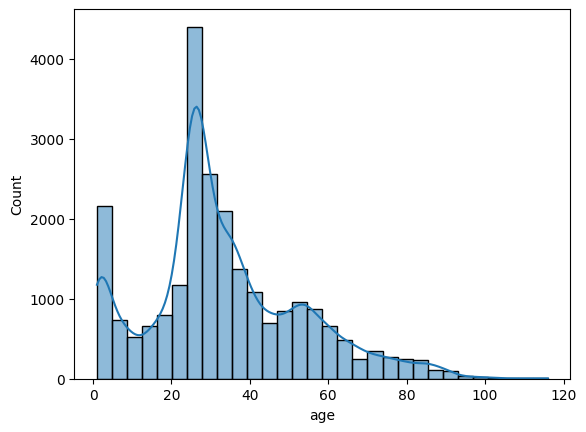

In [4]:
# Convert to DataFrame
df = pd.DataFrame({'image': image_paths, 'age': age_labels})
sns.histplot(df['age'], bins=30, kde=True)
plt.show()

## Exploratory Data Analysis

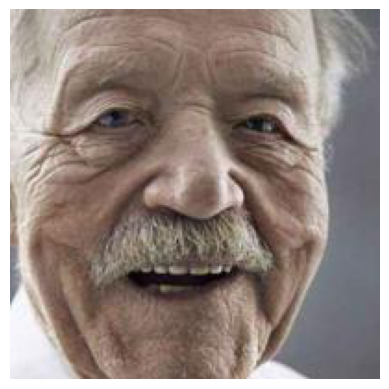

In [5]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);
plt.show()

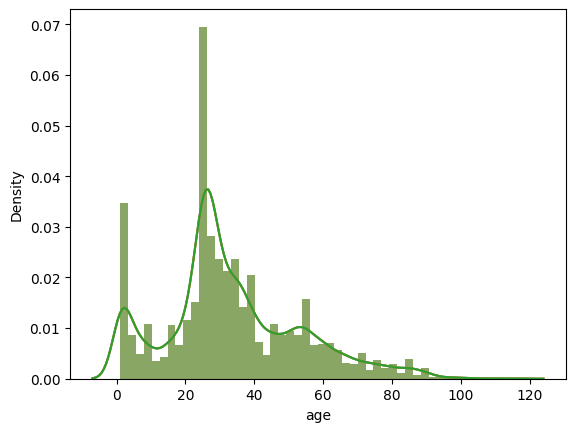

In [8]:
sns.distplot(df['age'])
plt.show()

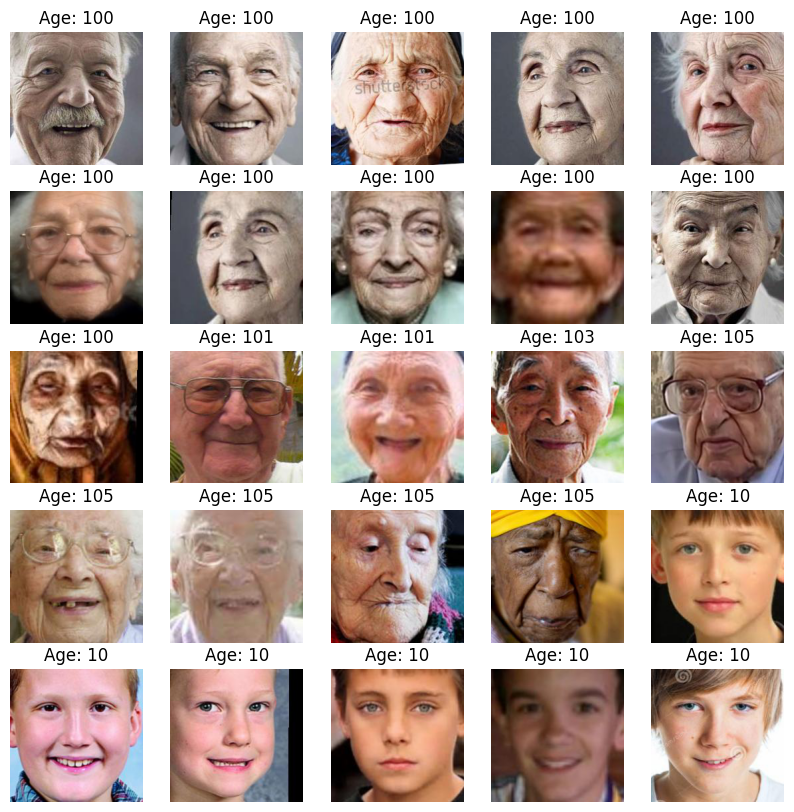

In [13]:
# to display grid of images
plt.figure(figsize=(10, 10))
files = df.iloc[0:25]

for index, file, age in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age}")
    plt.axis('off')
plt.show()

## Feature Extraction

In [16]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.LANCZOS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [17]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [18]:
X.shape

(23708, 128, 128, 1)

In [19]:
# normalize the images
X = X/255.0

In [20]:
y_age = np.array(df['age'])

In [21]:
input_shape = (128, 128, 1)

## Model Creation

In [25]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.4) (dense_1)
output_1 = Dense(1, activation='relu', name='age_out') (dropout_1)
model = Model(inputs=[inputs], outputs=[output_1])

model.compile(loss=['mae'], optimizer='adam', metrics=['mae'])

In [26]:
# train model
history = model.fit(x=X, y=[y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 236s 388ms/step - loss: 11.3805 - mae: 11.3805 - val_loss: 31.5898 - val_mae: 31.5898
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 230s 388ms/step - loss: 7.8550 - mae: 7.8550 - val_loss: 31.8389 - val_mae: 31.8389
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 230s 387ms/step - loss: 6.9879 - mae: 6.9879 - val_loss: 29.4111 - val_mae: 29.4111
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 230s 387ms/step - loss: 6.7493 - mae: 6.7493 - val_loss: 24.8862 - val_mae: 24.8862
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 230s 387ms/step - loss: 6.4470 - mae: 6.4470 - val_loss: 27.5132 - val_mae: 27.5132
Epoch 6/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 230s 387ms/step - loss: 6.2763 - mae: 6.2763 - val_loss: 27.0699 - val_mae: 27.0699
Epoch 7/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 262s 387ms/step - loss: 5.9555 - mae: 5.9555 - val_loss: 21.6209 - val_mae: 21.6209
Epoch 8/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 230s 387ms/step - loss: 5.7240 - mae: 5.7240 - val_loss: 21.3365 - val_mae: 21.3365
Epoch 

## Plot the Results

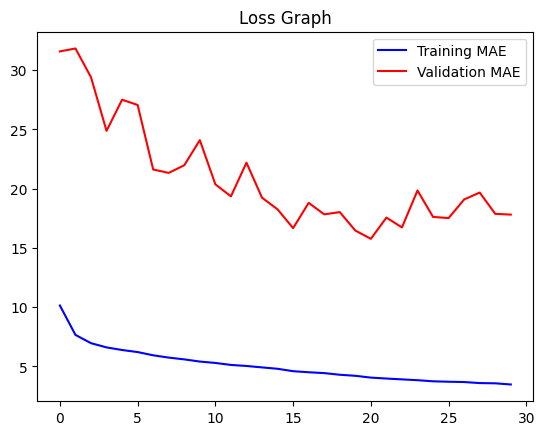

In [29]:
# plot results for age
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph')
plt.legend()
plt.show()

# Prediction with Test Data

Original Age: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Age: 13


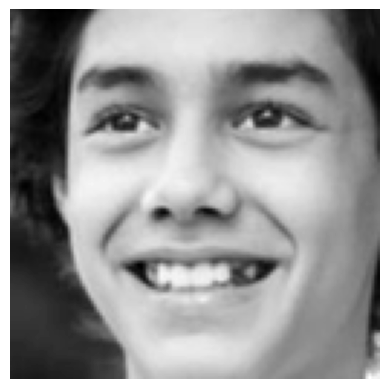

In [38]:
image_index = 100
print( "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_age = round(pred[0][0])
print( "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');
plt.show()

Original Age: 21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Age: 22


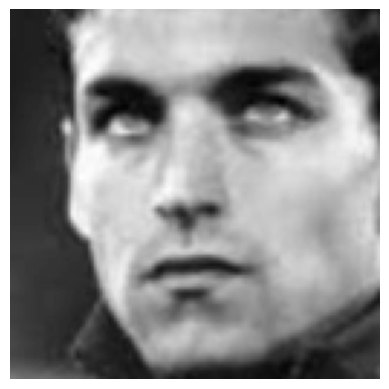

In [39]:
image_index = 3000
print( "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_age = round(pred[0][0])
print( "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');
plt.show()

Original Age: 29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Age: 29


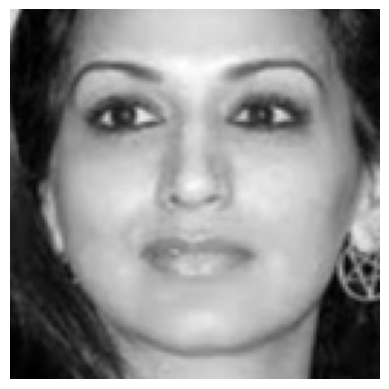

In [40]:
image_index = 10000
print( "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_age = round(pred[0][0])
print( "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Predict ages for the entire dataset
predictions = model.predict(X)
# If predictions have extra dimensions, flatten them
if predictions.ndim > 1:
    predictions = predictions.squeeze()
# Calculate the metrics
mae = mean_absolute_error(y_age, predictions)
mse = mean_squared_error(y_age, predictions)
r2 = r2_score(y_age, predictions)
# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
# Define a threshold for acceptable error (e.g., ±5 years)
threshold = 100
accuracy = np.mean(np.abs(predictions - y_age) <= threshold) * 100
print(f"Accuracy within ±{threshold} years: {accuracy:.2f}%")


741/741 ━━━━━━━━━━━━━━━━━━━━ 93s 125ms/step
Mean Absolute Error (MAE): 5.631146226692344
Mean Squared Error (MSE): 102.4373340109959
R² Score: 0.7409540302124886
Accuracy within ±100 years: 100.00%


In [44]:
# Save the model architecture to JSON
model_json = model.to_json()
with open("age_model.json", "w") as json_file:
    json_file.write(model_json)
# Save the model weights to HDF5 format
model.save_weights("age_model.weights.h5")
# Optionally save the entire model (architecture + weights) in one file
model.save("age_complete_model.h5")
print("Model has been saved successfully!")

Model has been saved successfully!
